### Task 3/5: Bifurcations in higher dimensions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import griddata

#### Phase diagrams for $\alpha=-1$, $\alpha=0$ and $\alpha=1$

In [2]:
#Set the range
x1 = np.arange(-1,1,0.1)
x2 = np.arange(-1,1,0.1)
X1, X2 = np.meshgrid(x1, x2)

In [3]:
dot_x1 = lambda x1, x2, alpha: alpha * x1 - x2 - x1 * (np.square(x1) + np.square(x2))
dot_x2 = lambda x1, x2, alpha: x1 + alpha * x2 - x2 * (np.square(x1) + np.square(x2))

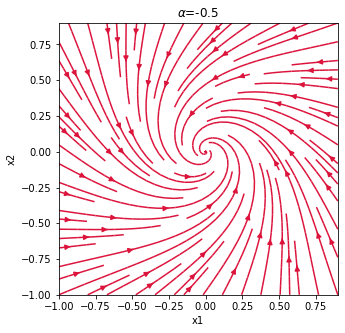

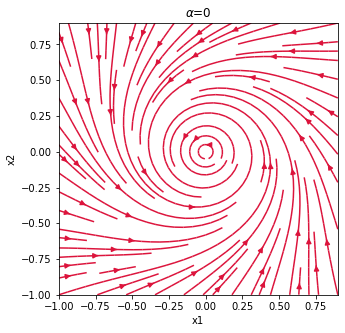

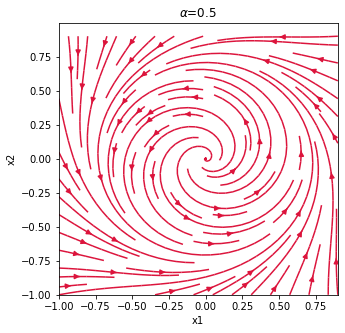

In [4]:
for alpha in [-0.5, 0, 0.5]:
    U = dot_x1(X1, X2, alpha)
    V = dot_x2(X1, X2, alpha)
    fig, ax = plt.subplots(figsize=(5,5))
    ax.streamplot(X1, X2, U, V, color = 'crimson')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(r'$\alpha$='+f'{alpha}') 

#### Compute and visualise the orbits for $\alpha=1$ starting at (2, 0) and (0.5, 0)

We use `solve_ivp()` and for it we need the function, which represents the right side of the system

In [5]:
def alpha_f(alpha):
    def f(t, y):
        x1, x2 = y
        return [
            dot_x1(x1, x2, alpha),
            dot_x2(x1, x2, alpha)
        ]
    return f

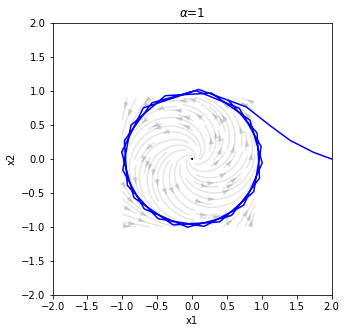

In [6]:
alpha = 1
sol = solve_ivp(alpha_f(alpha), (0, 20), (2, 0))
U = dot_x1(X1, X2, alpha)
V = dot_x2(X1, X2, alpha)
fig, ax = plt.subplots(figsize=(5,5))
ax.streamplot(X1, X2, U, V, color = (0.1,0,0,.1))
ax.plot(*sol.y, color='blue')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(r'$\alpha$='+f'{alpha}') 
plt.show()

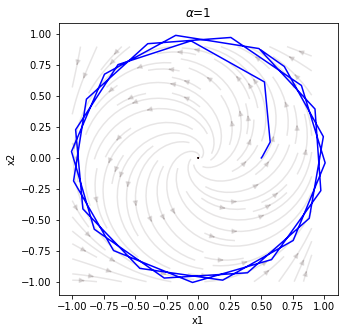

In [7]:
alpha = 1
sol = solve_ivp(alpha_f(alpha), (0, 20), (0.5, 0))
U = dot_x1(X1, X2, alpha)
V = dot_x2(X1, X2, alpha)
fig, ax = plt.subplots(figsize=(5,5))
ax.streamplot(X1, X2, U, V, color = (0.1,0,0,.1))
ax.plot(*sol.y, color='blue')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(r'$\alpha$='+f'{alpha}') 
plt.show()

#### Cusp bifurcation

In [8]:
def cusp_dot_x(alpha_1, alpha_2, x):
    return alpha_1 + alpha_2 * x - np.power(x, 3)

In [9]:
LIMIT = 40
STEP = 0.5

In [10]:
alpha_1_range = np.arange(-LIMIT,LIMIT,STEP)
alpha_2_range = np.arange(-LIMIT,LIMIT,STEP)
x_range = np.arange(-LIMIT,LIMIT,STEP)
ALPHA_1, ALPHA_2, X = np.meshgrid(
    alpha_1_range,
    alpha_2_range,
    x_range,
    indexing='ij'
) 

In [11]:
X_DOT = cusp_dot_x(ALPHA_1, ALPHA_2, X)

In [12]:
# Find the indices (alpha1 index, alpha2 index, x index) where X_DOT is very small
X_DOT_ZERO = np.argwhere(np.abs(X_DOT) < 0.0001)

In [13]:
ALPHA_1, ALPHA_2 = np.meshgrid(
    alpha_1_range,
    alpha_2_range,
    indexing='ij'
) 

In [14]:
# interpolate the values of x_dot for the mesh of alphas using the limited number of found datapoints and the "nearest" method
grid_z = griddata((alpha_1_range[X_DOT_ZERO[:,0]], alpha_2_range[X_DOT_ZERO[:,1]]), x_range[X_DOT_ZERO[:,2]], (ALPHA_1, ALPHA_2), method='nearest')

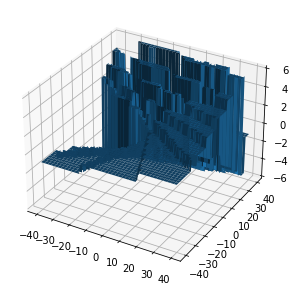

In [15]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(ALPHA_1, ALPHA_2, grid_z)
plt.show()
